In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
# %matplotlib inline


# Lendo o Dataset

In [2]:

URL = 'https://gist.githubusercontent.com/Ronildo22/a8983b7543c364534c75d6add6fc8413/raw/767bec26dbf90a2467380aba7d6f71a0820bc37e/depressionDataset'
df_depressao = pd.read_csv(URL)

df_depressao.shape


(1429, 23)

## Renomeando o cabeçalho do Dataframe

In [3]:

rename_df = {
            'Survey_id': 'id_pesquisa',
            'Ville_id': 'id_cidade',
            'sex': 'genero',
            'Age': 'idade',
            'Married': 'casado',
            'Number_children': 'numero_filhos',
            'education_level': 'nivel_educacao',
            'total_members': 'membros_familia',
            'gained_asset': 'ativos_adquiridos',
            'durable_asset': 'ativos_duraveis',
            'save_asset': 'ativos_poupados',
            'living_expenses': 'despesas_moradia',
            'other_expenses': 'outras_despesas',
            'incoming_salary': 'renda_salario',
            'incoming_own_farm': 'renda_fazenda_propria',
            'incoming_business': 'renda_negocios',
            'incoming_no_business': 'renda_sem_negocio',
            'incoming_agricultural': 'renda_agricola',
            'farm_expenses': 'despesas_fazenda',
            'labor_primary': 'trabalho_principal',
            'lasting_investment': 'investimento_duradouro',
            'no_lasting_investmen': 'sem_investimento_duradouro',
            'depressed': 'depressao'
            }

df_depressao.rename(columns=rename_df, inplace=True)
df_depressao.columns


Index(['id_pesquisa', 'id_cidade', 'genero', 'idade', 'casado',
       'numero_filhos', 'nivel_educacao', 'membros_familia',
       'ativos_adquiridos', 'ativos_duraveis', 'ativos_poupados',
       'despesas_moradia', 'outras_despesas', 'renda_salario',
       'renda_fazenda_propria', 'renda_negocios', 'renda_sem_negocio',
       'renda_agricola', 'despesas_fazenda', 'trabalho_principal',
       'investimento_duradouro', 'sem_investimento_duradouro', 'depressao'],
      dtype='object')

## Removendo Colunas Desnecessarias

In [4]:

df_depressao.drop(['id_pesquisa', 'id_cidade'], axis=1, inplace=True)

df_depressao.columns


Index(['genero', 'idade', 'casado', 'numero_filhos', 'nivel_educacao',
       'membros_familia', 'ativos_adquiridos', 'ativos_duraveis',
       'ativos_poupados', 'despesas_moradia', 'outras_despesas',
       'renda_salario', 'renda_fazenda_propria', 'renda_negocios',
       'renda_sem_negocio', 'renda_agricola', 'despesas_fazenda',
       'trabalho_principal', 'investimento_duradouro',
       'sem_investimento_duradouro', 'depressao'],
      dtype='object')

## Removendo Valores Vazios do Dataframe

In [5]:
df_depressao = df_depressao.dropna()

df_depressao.count()

genero                        1409
idade                         1409
casado                        1409
numero_filhos                 1409
nivel_educacao                1409
membros_familia               1409
ativos_adquiridos             1409
ativos_duraveis               1409
ativos_poupados               1409
despesas_moradia              1409
outras_despesas               1409
renda_salario                 1409
renda_fazenda_propria         1409
renda_negocios                1409
renda_sem_negocio             1409
renda_agricola                1409
despesas_fazenda              1409
trabalho_principal            1409
investimento_duradouro        1409
sem_investimento_duradouro    1409
depressao                     1409
dtype: int64

## Removendo Dados Enviesados do Dataframe


In [6]:
df_depressao['depressao'].value_counts()
# depressao
# 0    1174
# 1     235

# 939

linhas_a_serem_removidas = df_depressao[df_depressao['depressao'] == 0].head(939)
df_depressao.drop(linhas_a_serem_removidas.index, inplace=True)

df_depressao['depressao'].value_counts()


depressao
1    235
0    235
Name: count, dtype: int64

# Análise Exploratória

In [7]:
df_depressao.describe()


,genero,idade,casado,numero_filhos,nivel_educacao,membros_familia,ativos_adquiridos,ativos_duraveis,ativos_poupados,despesas_moradia,...,renda_salario,renda_fazenda_propria,renda_negocios,renda_sem_negocio,renda_agricola,despesas_fazenda,trabalho_principal,investimento_duradouro,sem_investimento_duradouro,depressao
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,4.700000e+02,4.700000e+02,4.700000e+02,4.700000e+02,...,470.000000,470.000000,470.000000,470.000000,4.700000e+02,4.700000e+02,470.000000,4.700000e+02,4.700000e+02,470.000000
mean,0.917021,36.378723,0.742553,2.961702,8.302128,5.146809,3.068718e+07,2.784189e+07,2.958035e+07,3.218173e+07,...,0.165957,0.253191,0.104255,0.238298,3.354952e+07,3.576076e+07,0.193617,3.223547e+07,3.551609e+07,0.500000
std,0.276144,15.132576,0.437693,1.988941,3.251078,1.788896,1.862905e+07,1.843149e+07,2.223575e+07,2.135443e+07,...,0.372439,0.435303,0.305917,0.426496,2.030246e+07,2.122404e+07,0.395553,2.136353e+07,2.142491e+07,0.500533
min,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,3.251120e+05,2.573670e+05,1.242339e+06,5.015480e+05,...,0.000000,0.000000,0.000000,0.000000,1.040999e+06,1.021536e+06,0.000000,7.429200e+04,1.263120e+05,0.000000
25%,1.000000,25.000000,0.000000,2.000000,7.000000,4.000000,2.026642e+07,2.286194e+07,2.084684e+07,2.045296e+07,...,0.000000,0.000000,0.000000,0.000000,2.218796e+07,2.387847e+07,0.000000,1.885389e+07,2.417542e+07,0.000000
50%,1.000000,32.000000,1.000000,3.000000,9.000000,5.000000,2.891220e+07,2.286194e+07,2.339998e+07,2.669228e+07,...,0.000000,0.000000,0.000000,0.000000,3.002882e+07,3.136343e+07,0.000000,2.841172e+07,2.829271e+07,0.500000
75%,1.000000,43.000000,1.000000,4.000000,10.000000,6.000000,2.966847e+07,2.286194e+07,2.339998e+07,3.508033e+07,...,0.000000,1.000000,0.000000,0.000000,3.811992e+07,4.335828e+07,0.000000,3.653724e+07,4.470958e+07,1.000000
max,1.000000,87.000000,1.000000,11.000000,18.000000,12.000000,9.609222e+07,9.769376e+07,9.992676e+07,9.929528e+07,...,1.000000,1.000000,1.000000,1.000000,9.978910e+07,9.921967e+07,1.000000,9.887554e+07,9.776049e+07,1.000000


## Verificando os Valores Únicos

In [8]:
df_depressao.nunique()

genero                          2
idade                          65
casado                          2
numero_filhos                  11
nivel_educacao                 16
membros_familia                12
ativos_adquiridos             227
ativos_duraveis               145
ativos_poupados               218
despesas_moradia              203
outras_despesas               260
renda_salario                   2
renda_fazenda_propria           2
renda_negocios                  2
renda_sem_negocio               2
renda_agricola                158
despesas_fazenda              276
trabalho_principal              2
investimento_duradouro        313
sem_investimento_duradouro    314
depressao                       2
dtype: int64

## Analisando a Faixa Etária

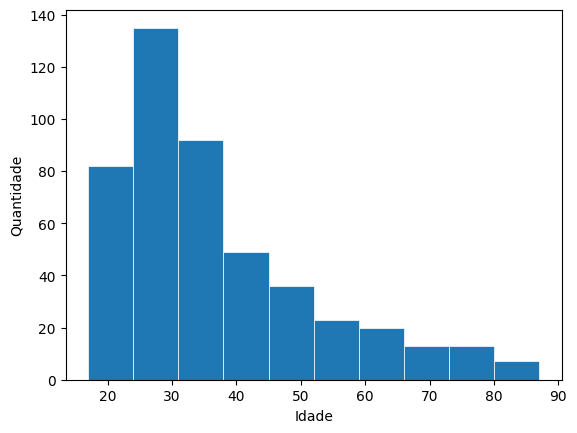

In [9]:
x = df_depressao['idade']

# PLOT HISTOGRAMA
fig , ax = plt.subplots()

ax.hist(x, linewidth=0.5, edgecolor='white')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

## Analisando o Gênero

Text(0, 0.5, 'Contagem')

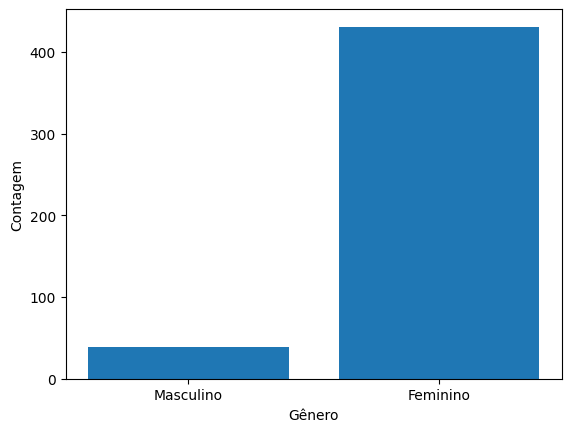

In [10]:
contagem_genero = df_depressao['genero'].value_counts()

# PLOT GRAFICO DE BARRAS
plt.bar(contagem_genero.index, contagem_genero.values)

plt.xticks([0, 1], ['Masculino', 'Feminino'])
plt.xlabel('Gênero')
plt.ylabel('Contagem')


## Analisando o Estado Civil

Text(0, 0.5, 'Contagem')

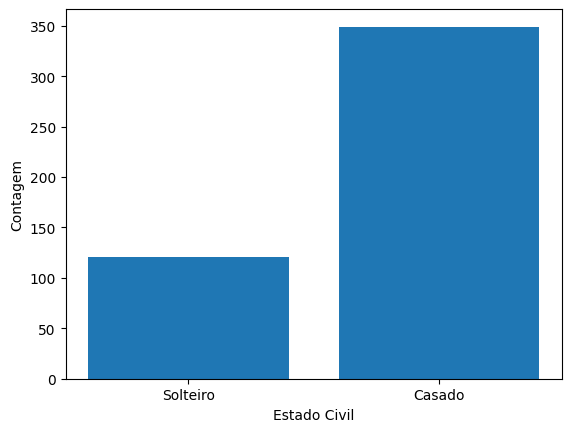

In [11]:
contagem_casado = df_depressao['casado'].value_counts()

# PLOT GRAFICO DE BARRAS
plt.bar(contagem_casado.index, contagem_casado.values)

plt.xticks([0, 1], ['Solteiro', 'Casado'])
plt.xlabel('Estado Civil')
plt.ylabel('Contagem')

# Preparando Dados

## Separando o rotulo y dos dados x

In [12]:

df_depressao.head()

y = df_depressao['depressao']

df_depressao.drop(['depressao'], axis=1, inplace=True)



y = np.array(y)

In [13]:

df_depressao

scaler = StandardScaler()
x = scaler.fit_transform(df_depressao)


# 232

# Treinando o modelo

## Metricas do modelo com seed = 30

In [26]:

seed = 30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=seed)

arvore = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=seed)
arvore.fit(x_train, y_train)

pred = arvore.predict(x_test)

acuracia = accuracy_score(y_test, pred)
acuracia = acuracia * 100

recall = recall_score(y_test, pred)
recall = recall * 100

precisao = precision_score(y_test, pred)
precisao = precisao * 100

f1 = f1_score(y_test, pred)
f1 = f1 * 100

mae = mean_absolute_error(y_test, pred)
mae = mae * 100

mse = mean_squared_error(y_test, pred)
mse = mse * 100

rmse = np.sqrt(mse)
rmse 


print('========== Metricas do modelo ==========')
print(f'Acuracia: {acuracia:.0f}%')
print(f'Recall: {recall:.0f}%')
print(f'Precisao: {precisao:.2f}%')
print(f'F1-score: {f1:.2f}%')
print(f"Erro Absoluto Médio (MAE): {mae:.0f}%",)
print(f"Erro Quadrático Médio (MSE): {mse:.0f}%")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")


array([[ 0.30081097,  0.17340535,  0.5888165 , ..., -0.49000565,
        -0.95104635,  0.42185298],
       [ 0.30081097, -0.81888988,  0.5888165 , ...,  2.04079278,
         2.99223913,  2.49260375],
       [ 0.30081097,  1.43031264, -1.69832197, ...,  2.04079278,
        -0.54004807,  2.86156146],
       ...,
       [ 0.30081097, -0.81888988,  0.5888165 , ..., -0.49000565,
        -0.17917568, -0.33750832],
       [-3.32434686, -0.55427782,  0.5888165 , ..., -0.49000565,
        -1.49065407, -0.70849241],
       [-3.32434686,  0.23955837, -1.69832197, ..., -0.49000565,
         1.12202023,  0.29756641]])

## Modelo Sem Seed Verificando Acuracia K-NN

C:\Users\Ronildo\AppData\Local\Temp\ipykernel_12988\651385981.py:33: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores)


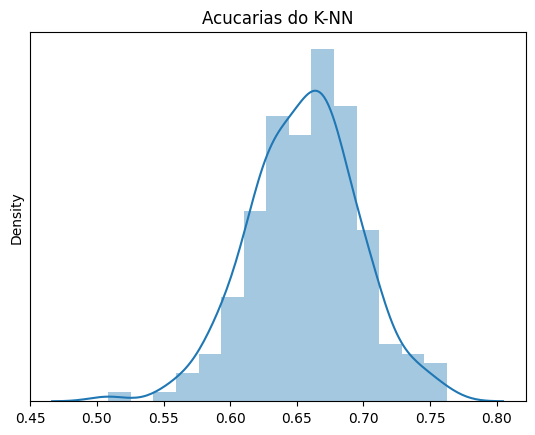

In [15]:
scores = []
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)

    arvore = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
    arvore.fit(x_train, y_train)

    pred= arvore.predict(x_test)
    
    acuracia = accuracy_score(y_test, pred)
    scores.append(acuracia)
    # acuracia = acuracia * 100

    recall = recall_score(y_test, pred)
    recall = recall * 100

    precisao = precision_score(y_test, pred)
    precisao = precisao * 100

    f1 = f1_score(y_test, pred)
    f1 = f1 * 100

    mae = mean_absolute_error(y_test, pred)
    mae = mae * 100

    mse = mean_squared_error(y_test, pred)
    mse = mse * 100

    rmse = np.sqrt(mse)
    rmse 


sns.distplot(scores)
plt.yticks([])
plt.title("Acucarias do K-NN")
plt.show()


print('========== Metricas do modelo ==========')
print(f'Acuracia: {acuracia:.0f}%')
print(f'Recall: {recall:.0f}%')
print(f'Precisao: {precisao:.2f}%')
print(f'F1-score: {f1:.2f}%')
print(f"Erro Absoluto Médio (MAE): {mae:.0f}%",)
print(f"Erro Quadrático Médio (MSE): {mse:.0f}%")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")



## Matriz de Confusão

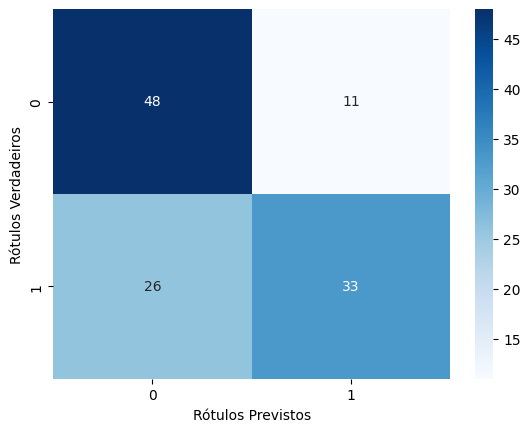

In [17]:
# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(y_test, pred)

# Criar um heatmap da matriz de confusão
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()